<a href="https://colab.research.google.com/github/bahgat-ahmed/Exploratory-Data-Analysis---Machine-Learning---Deep-Learning/blob/main/Insurance%20Data%20Exploratory%20Data%20Analysis%20(EDA)/Insurance_Data_Exploratory_Data_Analysis_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
import copy
sns.set() # set the default seaborn style for our plots

#2. Load the Data

In [2]:
insurance_df = pd.read_csv('insurance-data.csv')
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#3. Exploratory Data Analysis (EDA)

##3.1 Number of rows, columns, and data types

**Expected output:**

The data contains 1388 examples with 7 features with the following types:
1. 2 integer features
2. 2 float features
3. 3 string features

In [3]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Output is as expected.

##3.2 Check missing values

In [4]:
insurance_df.isna().apply(pd.value_counts)

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


No missing values.

##3.3 Check outliers (Numerical Data)

To check for outliers we usually use:
* Histogram
* Box plot

But Mean and standard deviation are misleading if outliers exist.


###3.3.1 Histogram

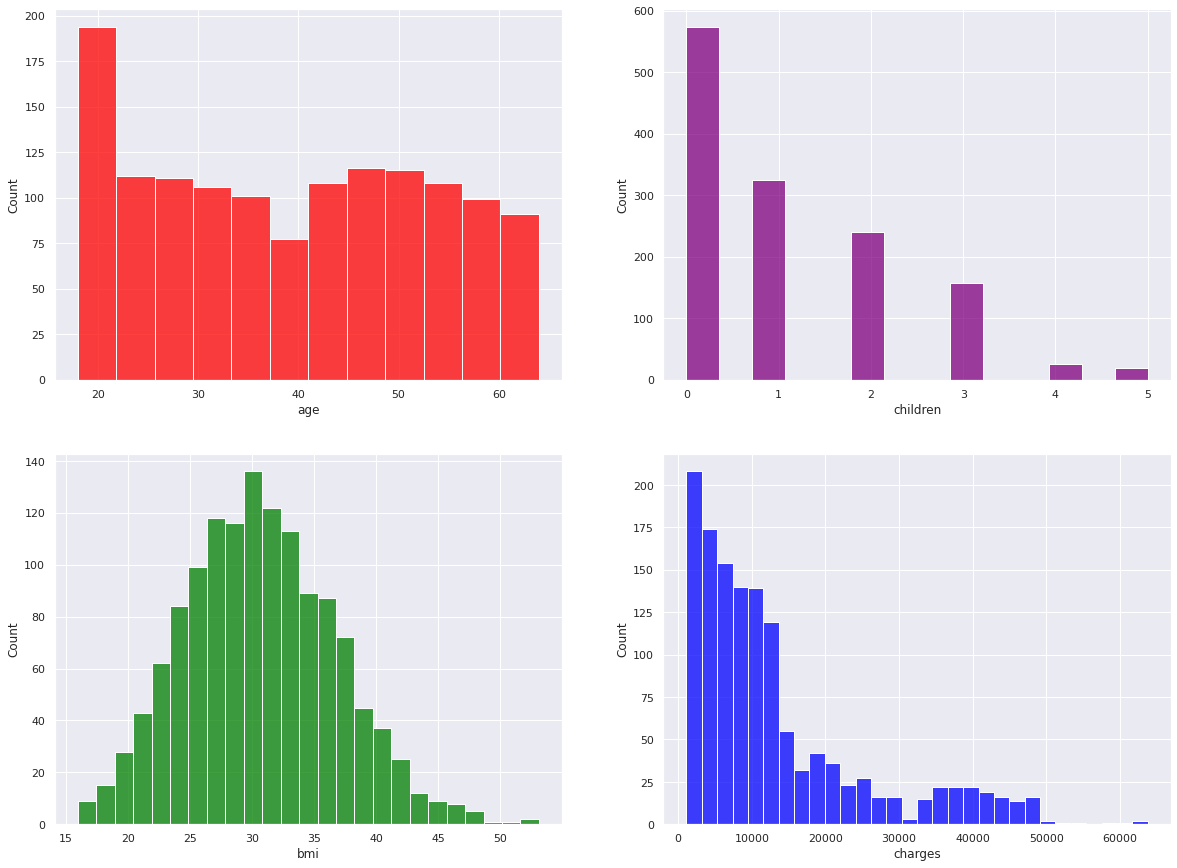

In [5]:
plt.figure(figsize = (20, 15))
plt.subplot(2, 2, 1)
sns.histplot(data=insurance_df.age, color='red')

plt.subplot(2, 2, 2)
sns.histplot(data=insurance_df.children, color='purple')

plt.subplot(2, 2, 3)
sns.histplot(data=insurance_df.bmi, color='green')

plt.subplot(2, 2, 4)
sns.histplot(data=insurance_df.charges, color='blue')

plt.show()

###3.3.1 Box Plot

In [6]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


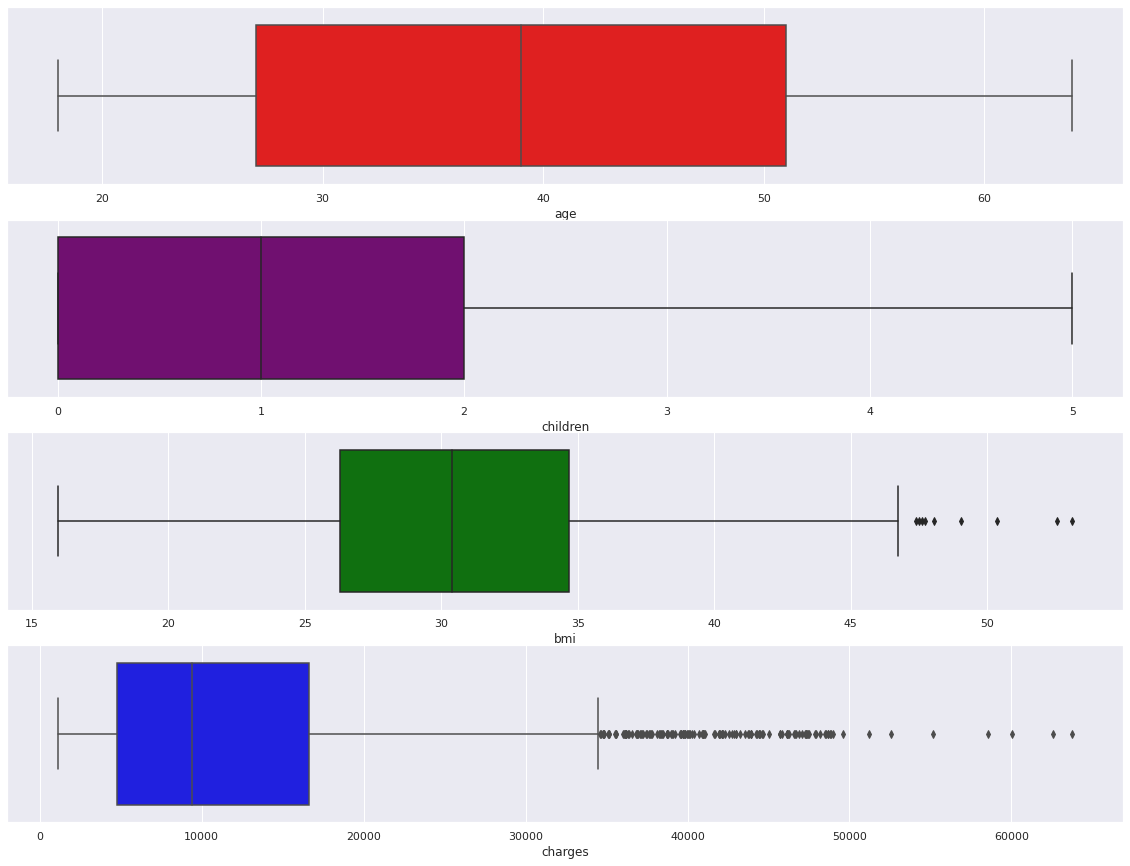

In [7]:
plt.figure(figsize = (20, 15))
plt.subplot(4, 1, 1)
sns.boxplot(x=insurance_df.age, color='red')

plt.subplot(4, 1, 2)
sns.boxplot(x=insurance_df.children, color='purple')

plt.subplot(4, 1, 3)
sns.boxplot(x=insurance_df.bmi, color='green')

plt.subplot(4, 1, 4)
sns.boxplot(x=insurance_df.charges, color='blue')

plt.show()

In [8]:
# brief summary for the dataset
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Skewness

In [9]:
# skewness of variables
skewness = pd.DataFrame({'Skewness': [stats.skew(insurance_df.age),
                                       stats.skew(insurance_df.children),
                                       stats.skew(insurance_df.bmi),
                                       stats.skew(insurance_df.charges)]},
                        index=['age', 'children', 'bmi', 'charges'])
skewness

,Skewness
age,0.055610
children,0.937328
bmi,0.283729
charges,1.514180


> As a general rule of thumb:

* Approximately symmetric (No Skew): $\left | skewness \right | < 0.5$
* Moderately Skewed: $ 0.5 < \left | skewness \right | < 1$
* Highly Skewed: $\left | skewness \right | > 1$

[source](https://community.gooddata.com/metrics-and-maql-kb-articles-43/normality-testing-skewness-and-kurtosis-241)

###Analysis of the previous plots and values

* **`age`**: looks quite reasonable with a mean of **39.2**. It is following a nearly uniform distribution thus there is no skew. Moreover, there are no outliers.
* **`children`**: are moderately right skewed with no outliers. **75%** of people have 2 or less children.
* **`bmi`**: follows a normal distribution. It has few extreme values which could not be considered outliers because they are not too far from the other data values.
* **`charges`**: has many extreme values (highly skewed) but are not considered outliers since charges increase that much could still be possible, and there are not a few of them.

> **Extreme value** is an observation with value at the boundaries of the domain, but **Outlier** is an observation which appears to be inconsistent with the remainder of that dataset values. [source](https://www.epfl.ch/labs/aprl/wp-content/uploads/2018/08/09_extremevals.html)

##3.4 Categorical Data

###3.4.1 Label Encoding categorical variables

In [36]:
from sklearn.preprocessing import LabelEncoder

encoded_insurance_df = copy.deepcopy(insurance_df)
encoded_insurance_df.loc[:, ['sex', 'smoker', 'region']] = \
encoded_insurance_df.loc[:, ['sex', 'smoker', 'region']].apply(LabelEncoder().
                                                               fit_transform)

encoded_insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


###3.4.2 Pairplot

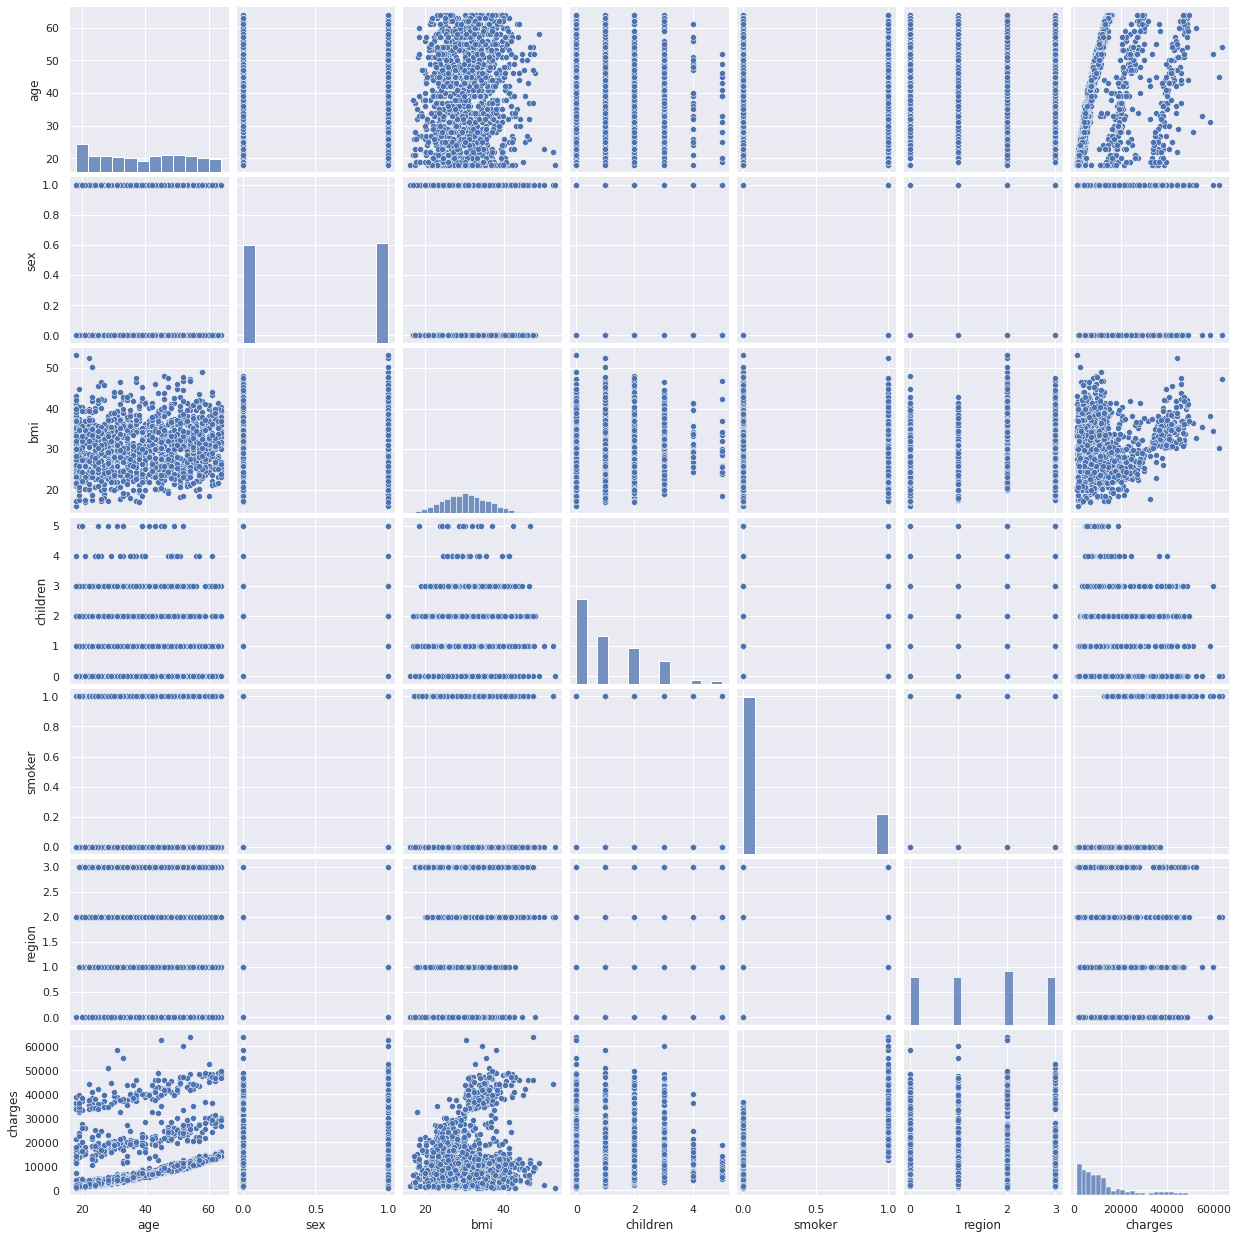

In [29]:
sns.pairplot(encoded_insurance_df)
plt.show()

###3.4.3 Asking more questions on more than two variables

In [38]:
# number of smokers and non-smokers
insurance_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


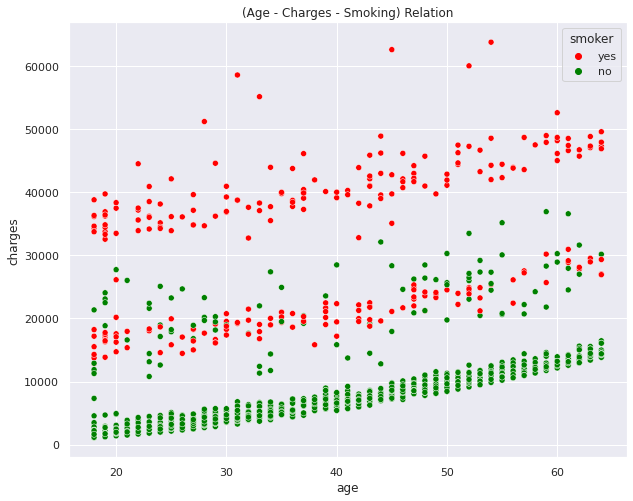

In [43]:
# inspecting the relation between age, charges, and smoking
plt.figure(figsize=(10, 8))
sns.scatterplot(insurance_df.age, insurance_df.charges, hue=insurance_df.smoker,
                palette=['red', 'green'])
plt.title('(Age - Charges - Smoking) Relation')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


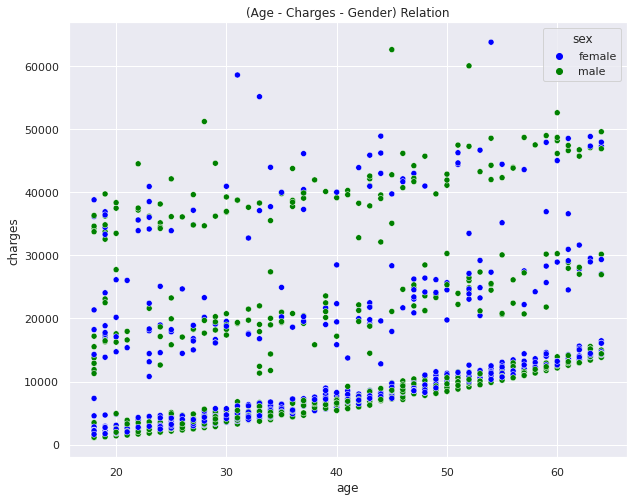

In [45]:
# inspecting the relation between age, charges, and sex (gender)
plt.figure(figsize=(10, 8))
sns.scatterplot(insurance_df.age, insurance_df.charges, hue=insurance_df.sex,
                palette=['blue', 'green'])
plt.title('(Age - Charges - Sex) Relation')
plt.show()

### Analysis

* There is a correlation between **charges** and **smokers**. Smokers pay more money than non-smokers.
* There is a positive correlation between **age** and **charges**. Older people pay more than young people.
* It is obvious that **smokers** are charged more.
* It seems that gender has no relation with charges or age.